In [57]:
import torchvision
import torch
import torchvision.transforms as transforms
from torchvision.datasets import VOCDetection
import os
from torch.utils.data import DataLoader

In [64]:
class mytransform():
    def __init__(self):
        self.transform = transforms.Compose([transforms.Resize((640, 640)),
                                            transforms.ToTensor()])

    def __call__(self, img, target):

        xmin = int(target['annotation']['object'][0]['bndbox']['xmin'])
        xmax = int(target['annotation']['object'][0]['bndbox']['xmax'])
        ymin = int(target['annotation']['object'][0]['bndbox']['ymin'])
        ymax = int(target['annotation']['object'][0]['bndbox']['ymax'])


        target = torch.Tensor([xmin, ymin, xmax, ymax])

        return self.transform(img), target
    
transform = mytransform()

In [65]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import VOCDetection


# Initialize dataset
voc_dataset = VOCDetection(root=r'C:\Users\34644\Desktop\Firts Semester\Vision and learning\archive (4)',
                           year='2012',
                           image_set='train',  # Use 'val' for validation set
                           download=False,     # Set to True if you want to download the dataset
                           transforms=transform)

# Initialize DataLoader
batch_size = 32 # You can change this value
shuffle = True   # Shuffle the dataset; typically True for training, False for validation

data_loader = DataLoader(voc_dataset, batch_size=batch_size, shuffle=shuffle)


In [83]:
import matplotlib.pyplot as plt
img_tensor = next(iter(data_loader))[0][0]

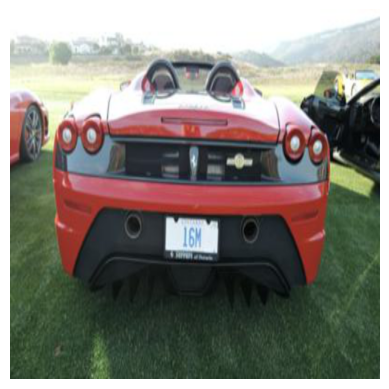

In [84]:
import matplotlib.pyplot as plt
import torch

# Assuming img_tensor is your [3, 640, 640] tensor
# img_tensor = torch.randn([3, 640, 640])  # Just an example, replace with your actual tensor

# Reorder dimensions to be [H, W, C]
img_to_plot = img_tensor.permute(1, 2, 0).numpy()

# If necessary, rescale the tensor values to [0, 1] or [0, 255]
# For example, if your tensor has values in [0, 1], you can skip this step
# If your tensor has another range, you might need to scale appropriately
# img_to_plot = (img_to_plot - img_to_plot.min()) / (img_to_plot.max() - img_to_plot.min())

plt.imshow(img_to_plot)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


In [35]:
#from PIL import Image
#import os
#
## Path to the folder containing your PNG images
#input_folder = r"C:\Users\34644\Desktop\Firts Semester\Vision and learning\archive (4)\VOCdevkit\VOC2012\PEGImages"
#
## Path where the new JPEG images will be saved
#output_folder = r"C:\Users\34644\Desktop\Firts Semester\Vision and learning\archive (4)\VOCdevkit\VOC2012\JPEGImages"
#
## Create the output folder if it doesn't exist
#if not os.path.exists(output_folder):
#    os.makedirs(output_folder)
#
## Iterate over all files in the input folder
#for filename in os.listdir(input_folder):
#    if filename.endswith(".png"):
#        # Open an image file
#        img = Image.open(os.path.join(input_folder, filename)).convert("RGB")
#        
#        # Save it as a JPEG in the output folder
#        img.save(os.path.join(output_folder, filename[:-4] + ".jpg"))
#